In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [36]:
iris=pd.read_csv('iris_dataset_missing.csv')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
5,6.707485,3.093846,5.048317,2.373470,Iris-virginica
6,4.811740,3.037915,1.494268,-0.042428,Iris-setosa
7,5.205868,NaN,1.675654,0.112269,Iris-setosa
8,4.436832,2.867772,1.428415,0.385249,Iris-setosa
9,6.847619,3.132270,5.878479,2.166297,Iris-virginica


## Question 1


##### 1.1 CM1

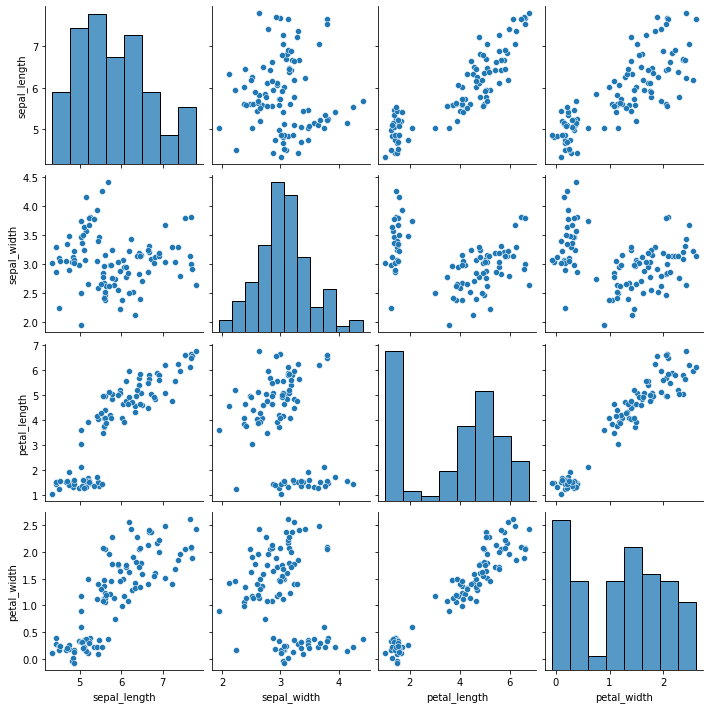

In [37]:
pp=sns.pairplot(iris)

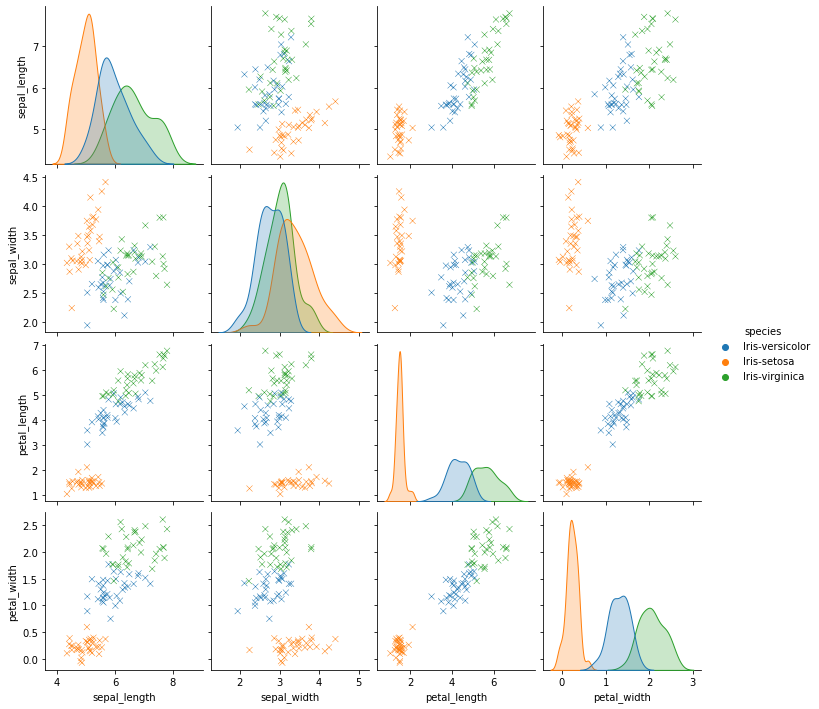

In [38]:
%matplotlib inline
a=sns.pairplot(iris, hue="species",markers="x")

#### CM2

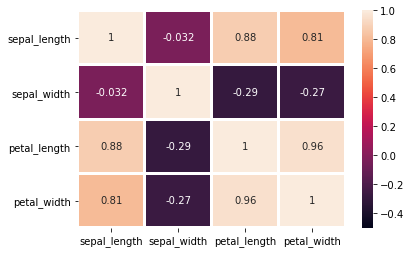

In [39]:
sns.heatmap(iris.corr(), annot=True , linecolor='white',linewidth='2', vmin='-0.5',vmax='1');

In [40]:
iris.shape

(105, 5)

### CM2 Calculation of mean, mode, variance, skew, kurtosis 

In [41]:
mean=iris.mean()
mean

sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64

In [42]:
median=iris.median()
median

sepal_length    5.736104
sepal_width     3.049459
petal_length    4.276817
petal_width     1.331797
dtype: float64

In [43]:
var=iris.var()
var

sepal_length    0.742420
sepal_width     0.207131
petal_length    3.216602
petal_width     0.619672
dtype: float64

In [44]:
kurtosis=iris.kurtosis()
kurtosis

sepal_length   -0.544820
sepal_width     0.510490
petal_length   -1.389810
petal_width    -1.315451
dtype: float64

In [45]:
std=iris.std()
std

sepal_length    0.861638
sepal_width     0.455116
petal_length    1.793489
petal_width     0.787193
dtype: float64

In [46]:
skew=iris.skew()
skew

sepal_length    0.401506
sepal_width     0.367708
petal_length   -0.255767
petal_width    -0.074751
dtype: float64

In [47]:
#Question 2
iris.shape

(105, 5)

In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   101 non-null    float64
 2   petal_length  97 non-null     float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [49]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


## CM3: Outlier check with Boxplot and IQR :

<AxesSubplot:>

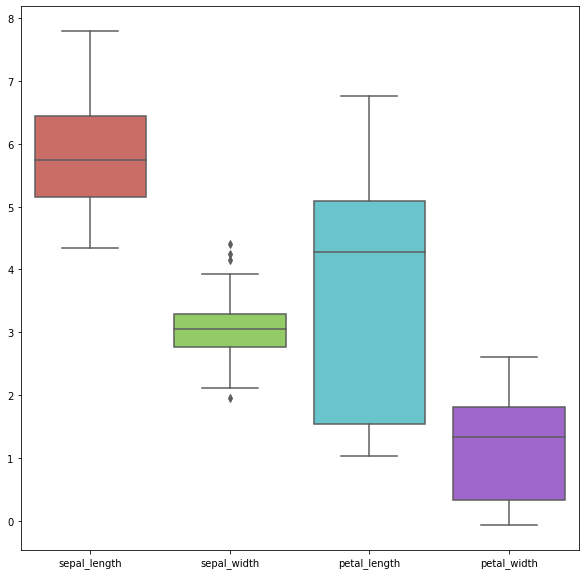

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris, palette='hls')

There are four outliers in sepal_width, which can be seen from the boxplot. There are some negative values,too for petal_width

(array([13., 21.,  1.,  3., 12., 15., 13., 11.,  8.,  8.]),
 array([-0.07220259,  0.19532992,  0.46286243,  0.73039495,  0.99792746,
         1.26545997,  1.53299248,  1.80052499,  2.0680575 ,  2.33559001,
         2.60312252]),
 <BarContainer object of 10 artists>)

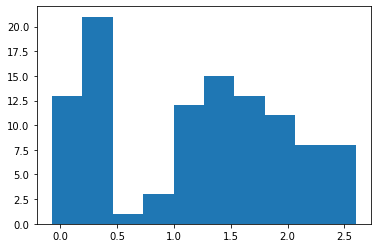

In [51]:
plt.hist(iris.petal_width)

###### Following calculation for total numbers of negative values check in petal_width as length cannot be negative

In [52]:
ax_pw=iris[(iris['petal_width'])<0].index
ax_pw

Int64Index([6, 67], dtype='int64')

##### we can see that there are two negative values of petal width there at index  6 and 67

##### Regarding negative data in petal_width
1. We have removed the observations with negative petal length values, as we can hardly assume them
2. We haven't replaced with mean as it would be biased considering the negative values.**

In [53]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [54]:
Q1=iris.quantile(0.25)
Q3=iris.quantile(0.75)
Q1,Q3

(sepal_length    5.159145
 sepal_width     2.768688
 petal_length    1.545136
 petal_width     0.333494
 Name: 0.25, dtype: float64,
 sepal_length    6.435413
 sepal_width     3.290318
 petal_length    5.094427
 petal_width     1.817211
 Name: 0.75, dtype: float64)

In [55]:
IQR=Q3-Q1
IQR

sepal_length    1.276268
sepal_width     0.521630
petal_length    3.549291
petal_width     1.483717
dtype: float64

In [58]:
lower=Q1 - 1.5*IQR
upper=Q3 + 1.5*IQR
lower,upper

(sepal_length    3.244743
 sepal_width     1.986243
 petal_length   -3.778801
 petal_width    -1.892081
 dtype: float64,
 sepal_length     8.349814
 sepal_width      4.072763
 petal_length    10.418364
 petal_width      4.042786
 dtype: float64)

In [59]:
sw_l=lower.sepal_width
sw_up=upper.sepal_width
print('For Sepal Width : Q1=%.4f, Q3=%.4f ,IQR= %.4f, lower_limit=%.4f, upper_limit=%.4f' %(Q1.sepal_width,Q3.sepal_width, IQR.sepal_width,sw_l,sw_up))
#sw_ol is index of outliers in sepal width , 4 no. of outliers
sw_ol=iris[(iris['sepal_width']<sw_l) | (iris['sepal_width']>sw_up)]['sepal_width'].index
sw_ol

For Sepal Width : Q1=2.7687, Q3=3.2903 ,IQR= 0.5216, lower_limit=1.9862, upper_limit=4.0728


Int64Index([30, 72, 86, 102], dtype='int64')

###### Here, we can observe the following things : 
1. 2 negative values are there in petal_width at index 6 and 67
2. 4 outliers are there in sepal_width 

Replacing these values with mean/median will bias the model towards this replaced value. Removing these observations may give us better accuracy for our model.

In [61]:
iris.drop([6,30,67,72,86,102],inplace= True)

We have removed all the six values.

### CM5 : Data Cleaning by replacing null values with suitable values 

In [62]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  99 non-null     float64
 1   sepal_width   95 non-null     float64
 2   petal_length  92 non-null     float64
 3   petal_width   99 non-null     float64
 4   species       99 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [63]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


In [64]:
iris[['petal_length','sepal_width']].isna()

,petal_length,sepal_width
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99,False,False
100,False,False
101,False,False
103,False,False


In [65]:
#petallength missing data = plm 
plm=iris['petal_length'].isna()

In [66]:
# Observations having petal_length as null values, for insights only.
iris.loc[plm,:]

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.847160,2.743619,NaN,0.748681,Iris-versicolor
37,6.271780,2.521065,NaN,1.896626,Iris-virginica
39,5.040516,3.466344,NaN,0.314548,Iris-setosa
41,4.496342,3.098270,NaN,0.242853,Iris-setosa
50,5.817283,2.633800,NaN,1.141347,Iris-versicolor
65,6.235536,3.425253,NaN,2.423053,Iris-virginica
85,5.911822,2.560512,NaN,1.766513,Iris-virginica


In [67]:
#sepalwidth missing data = swm 
# Output from this cell are the observations having sepal_width as null values, for insights only.
swm=iris['sepal_width'].isna()
iris.loc[swm,:]

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.205868,NaN,1.675654,0.112269,Iris-setosa
21,6.365979,NaN,4.964905,1.817211,Iris-virginica
54,6.265590,NaN,4.701306,1.290187,Iris-versicolor
64,6.340344,NaN,4.302989,1.331797,Iris-versicolor


In [71]:
#mean_r is the revised mean
# We have calculated revised mean , as we have replaced the outliers with median in sepal_width feature
mean_r=iris.mean()
mean_r

sepal_length    5.899947
sepal_width     3.032723
petal_length    3.915460
petal_width     1.257211
dtype: float64

In [75]:
#filled with revised mean as this is giving the better accuracy than interpolation (linear method), ffill and bfill method
irisF= iris.fillna(mean_r)
irisF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,99.000000,99.000000,99.000000,99.000000
mean,5.899947,3.032723,3.915460,1.257211
std,0.866958,0.391079,1.709368,0.769901
min,4.344007,2.115481,1.033031,0.020731
25%,5.213308,2.770209,1.693942,0.349046
50%,5.780425,3.032723,4.192791,1.400355
75%,6.445431,3.234971,5.086333,1.860809
max,7.795561,3.934553,6.768611,2.603123


In [77]:
irisF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  99 non-null     float64
 1   sepal_width   99 non-null     float64
 2   petal_length  99 non-null     float64
 3   petal_width   99 non-null     float64
 4   species       99 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [78]:
iris.shape

(99, 5)

## Question 2 : KNN

Question 2.1

In [79]:
#segregation of a feature 
x_irisF=irisF.drop(['species'],axis=1)
x_irisF.shape

(99, 4)

In [80]:
#Segregation of Target
y_irisF=irisF['species']
y_irisF.shape

(99,)

In [81]:
#Splitting the dataset in training and testing
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_irisF,y_irisF,test_size=0.4, random_state=275)


In [82]:
x_test,x_val,y_test,y_val = train_test_split(x_val,y_val,test_size=0.5, random_state=275)

In [83]:
#Question 2.1
print(x_train.shape,x_val.shape,x_test.shape)

(59, 4) (20, 4) (20, 4)


The data set is spliited in train , test and validation in 60% , 20% and 20% respectively

Question 2.2

In [84]:
#Question 2.2 
#Training the model using the classifier
from sklearn.neighbors import KNeighborsClassifier
x=x_train
y=y_train
iris_model= KNeighborsClassifier()
iris_model.fit(x,y)
y_pred= iris_model.predict(x)

In [85]:
#Now For accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score (y,y_pred)

0.9491525423728814

In [86]:
x=x_train
y=y_train
iris_model= KNeighborsClassifier()
iris_model.fit(x,y)
y_pred= iris_model.predict(x_test)

Below accuracy_default is the accuracy with default parameters, modelling using train set and testing on test set 

In [87]:
#Accuracy_default parameter is for Question 2.2 
accuracy_default=accuracy_score (y_test,y_pred)
accuracy_default

0.9

In [88]:
#We can see that there are 3 observations at index 85, 81 ,41 giving wrong prediction , 
#This indicated the 85% accuracy of the data
import pandas as pd 
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df1.head(21)

,Actual,Predicted
8,Iris-setosa,Iris-setosa
84,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
31,Iris-setosa,Iris-setosa
53,Iris-virginica,Iris-virginica
68,Iris-virginica,Iris-virginica
89,Iris-setosa,Iris-setosa
80,Iris-setosa,Iris-setosa
47,Iris-virginica,Iris-virginica
49,Iris-virginica,Iris-virginica


Question 2.3

In [89]:
k=[1,5,10,15,20,25,30,35]
ac=list()
for n in k:
    x=x_train
    y=y_train
    heart_model= KNeighborsClassifier(n_neighbors=n)
    heart_model.fit(x,y)
    y_pred= heart_model.predict(x_val)
    AC=accuracy_score(y_val,y_pred)
    ac.append(AC)
ac

[0.85, 0.85, 0.8, 0.8, 0.8, 0.8, 0.8, 0.5]

In [90]:
#accuracy_k is dataframe of  k vs accuracy
accuracy_k=pd.DataFrame ({'k':k,'accuracy':ac})
print(accuracy_k.values)

[[ 1.    0.85]
 [ 5.    0.85]
 [10.    0.8 ]
 [15.    0.8 ]
 [20.    0.8 ]
 [25.    0.8 ]
 [30.    0.8 ]
 [35.    0.5 ]]


Text(0, 0.5, 'Accuracy')

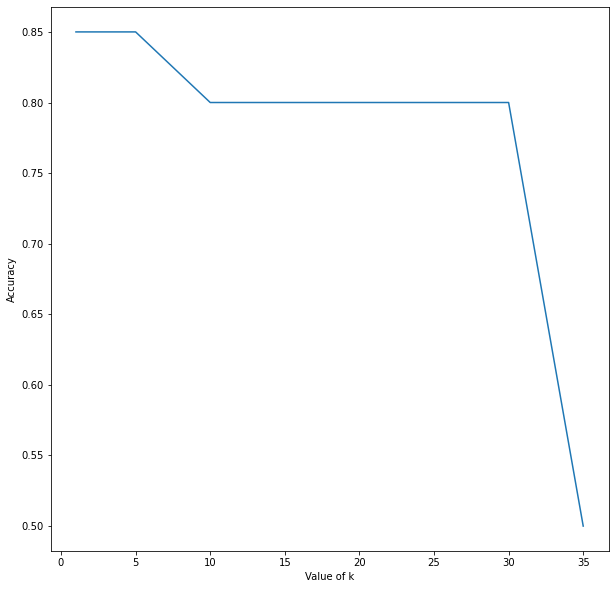

In [91]:
#For k=5 we are getting maximum validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(k,ac)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

### CM7: 
Question 2.4 

1. We can not consider the k=1 despite the accuracy is higher as the output will not be accurate considering 1 nearest neighbor
2. From the above graph, we can see that, we are getting maximum accuracy on validation set ,at k=5,10 15,20.
3. Here we have selected k = 5


In [103]:
#Best Value of k=5 taken considering the accuracies
x=x_train
y=y_train
iris_model= KNeighborsClassifier(n_neighbors=5)
iris_model.fit(x,y)
y_pred= iris_model.predict(x_test)
ac_test=accuracy_score(y_test,y_pred)
ac_test

0.9

In [104]:
from sklearn import metrics
y_pred_proba=iris_model.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
AUC=sklearn.metrics.roc_auc_score(y_test,y_pred_proba,multi_class='ovr')
AUC

0.9841666666666667

In [105]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test, y_pred, average='macro')
f1_macro

0.8916666666666667

### Now, we are having our model good accuracy. It can be further improved by following methods :

#### 2.5 Normalisation 
Here, in Iris dataset, we did not normalise the data as all the features are nearly in same scale. There is no huge variation. Due to which we did not normalise the iris dataset as it won't change much the accuracy.

#### 2.6 Weighted KNN

1. With default(minkowski) , Euclidian and manhattan distance 

In [114]:
metric= ['minkowski', 'euclidean' , 'manhattan']
ac_weighted=list()
for m in metric:
    x=x_train
    y=y_train
    iris_model= KNeighborsClassifier(n_neighbors=5, metric = m, weights= 'uniform')
    iris_model.fit(x,y)
    y_pred= iris_model.predict(x_val)
    ac_w=accuracy_score(y_val,y_pred)
    ac_weighted.append(ac_w)
ac_weighted

[0.85, 0.85, 0.85]

In [115]:
#ac_weighted is accuracy with weighted knn
#accuracy_weight is data of metric distance and accuracy

accuracy_weight=pd.DataFrame ({'Metric':metric,'accuracy':ac_weighted})
print(accuracy_weight.values)

[['minkowski' 0.85]
 ['euclidean' 0.85]
 ['manhattan' 0.85]]


From above we can see that we are getting improved accuracy of our knn classifier with manhattan distance.  So, we are considering that as final classification model

### CM7
Question 2.7

1. Accuracy with weighted KNN is nearly same as before for our classifier, while testing on validation set.
2. So, Considering the effect of weighted KNN won't make much difference.


###### Following is the final output accuracy, AUC and f1-score of the best KNN Model ,We have not considered weighted KNN.



In [126]:
# ac_test is the best accuracy while testing on test set [ IN 103].

ac_test

0.9

In [129]:
# AUC score [IN 104]
AUC

0.9841666666666667

In [130]:
#f1_macro is f1_score with macro ( IN 106)
f1_macro

0.8916666666666667